# **Import necessary packages and dataset from google drive**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Initialize Dataset**

In [2]:
letreg_df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets2/page-blocks.csv'))
letreg_df.head()
letreg_df.info()
letreg_df.shape
letreg_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   height      5473 non-null   int64  
 2   length      5473 non-null   int64  
 3   area        5473 non-null   int64  
 4   eccen       5473 non-null   float64
 5   p_black     5473 non-null   float64
 6   p_and       5473 non-null   float64
 7   mean_tr     5473 non-null   float64
 8   blackpix    5473 non-null   int64  
 9   blackand    5473 non-null   int64  
 10  wb_trans    5473 non-null   int64  
 11  class       5473 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 513.2 KB


,Unnamed: 0,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
count,0.0,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,NaN,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,NaN,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,NaN,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,NaN,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,NaN,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,NaN,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,NaN,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


# **Duplicate the dataset, as a safety, and remove null values**

In [3]:
letreg_dup = letreg_df.copy()
letreg_dup.info()
letreg_dup.head()
letreg_dup.shape
letreg_dup.describe()

#Dataset size
initial_rows, initial_cols = letreg_dup.shape

print("Percentage of Null Values of dataset Features:")
round(100*(letreg_dup.isnull().sum()/len(letreg_dup)), 2).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   height      5473 non-null   int64  
 2   length      5473 non-null   int64  
 3   area        5473 non-null   int64  
 4   eccen       5473 non-null   float64
 5   p_black     5473 non-null   float64
 6   p_and       5473 non-null   float64
 7   mean_tr     5473 non-null   float64
 8   blackpix    5473 non-null   int64  
 9   blackand    5473 non-null   int64  
 10  wb_trans    5473 non-null   int64  
 11  class       5473 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 513.2 KB
Percentage of Null Values of dataset Features:


Unnamed: 0    100.0
height          0.0
length          0.0
area            0.0
eccen           0.0
p_black         0.0
p_and           0.0
mean_tr         0.0
blackpix        0.0
blackand        0.0
wb_trans        0.0
class           0.0
dtype: float64

# **Remove duplicates and view updated dataset**

In [4]:
letreg_dup.drop_duplicates(subset = None, inplace = True)
print(letreg_dup.shape)
print(letreg_df.shape)

updated_rows, updated_cols = letreg_dup.shape
print("\nDataset Information After Cleaning:")
print(letreg_dup.info())

# Display summary statistics of the dataset after cleaning
print("\nSummary Statistics After Cleaning:")
print(letreg_dup.describe())

# Summary of cleaning process
print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")

(5406, 12)
(5473, 12)

Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 5406 entries, 0 to 5471
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   height      5406 non-null   int64  
 2   length      5406 non-null   int64  
 3   area        5406 non-null   int64  
 4   eccen       5406 non-null   float64
 5   p_black     5406 non-null   float64
 6   p_and       5406 non-null   float64
 7   mean_tr     5406 non-null   float64
 8   blackpix    5406 non-null   int64  
 9   blackand    5406 non-null   int64  
 10  wb_trans    5406 non-null   int64  
 11  class       5406 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 549.0 KB
None

Summary Statistics After Cleaning:
       Unnamed: 0       height       length           area        eccen  \
count         0.0  5406.000000  5406.000000    5406.000000  5406.000000   
mean          NaN    1

# **Models to use**

In [5]:
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42)
}

# **Models with all features**

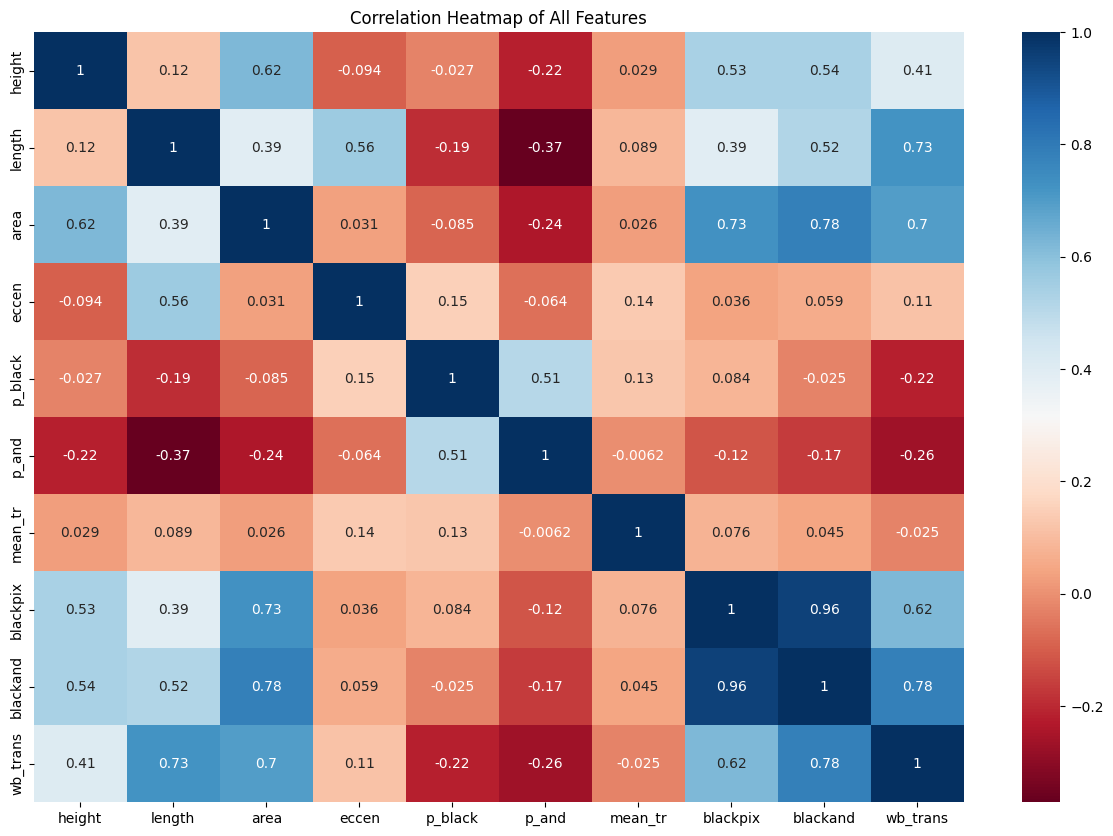

Scores with all features and without any added techniques:
Naive Bayes: 93.35%
Decision Tree: 96.49%
Random Forest: 97.97%
Support Vector Machine: 91.04%
SGD Classifier: 93.81%


In [6]:
X = letreg_dup[['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'blackand', 'wb_trans']]
y = letreg_dup['class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot correlation heatmap for all features
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot = True, cmap="RdBu")
plt.title('Correlation Heatmap of All Features')
plt.show()

# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Print scores before RFE
print("Scores with all features and without any added techniques:")
for name, accuracy in results_all_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

# **Models with selected features**

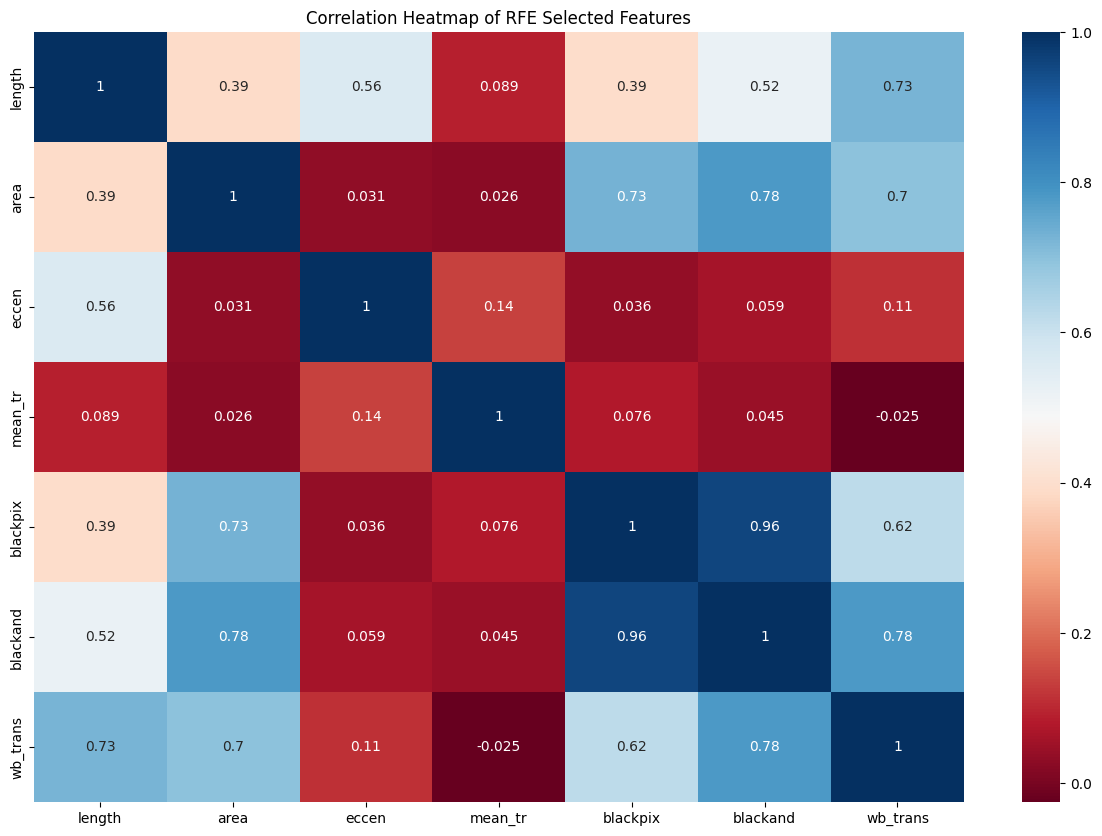

Scores with selected features and without any added techniques:
Naive Bayes: 75.05%
Decision Tree: 95.01%
Random Forest: 97.41%
Support Vector Machine: 91.04%
SGD Classifier: 91.68%


In [7]:
X_selected = letreg_dup[['length', 'area', 'eccen', 'mean_tr', 'blackpix', 'blackand', 'wb_trans']]
y_selected = letreg_dup['class']
# Split the data into training and testing sets
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Plot correlation heatmap for selected features
plt.figure(figsize=(15, 10))
sns.heatmap(X_selected.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

# Train and evaluate models with all features
results_selected_features = {}
for name, model in models.items():
    model.fit(X_train_st, y_train_st)
    predictions = model.predict(X_test_st)
    accuracy = accuracy_score(y_test_st, predictions)
    results_selected_features[name] = accuracy

# Print scores before RFE
print("Scores with selected features and without any added techniques:")
for name, accuracy in results_selected_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

# **Plot the accuracy results (All Features vs Selected Features)**

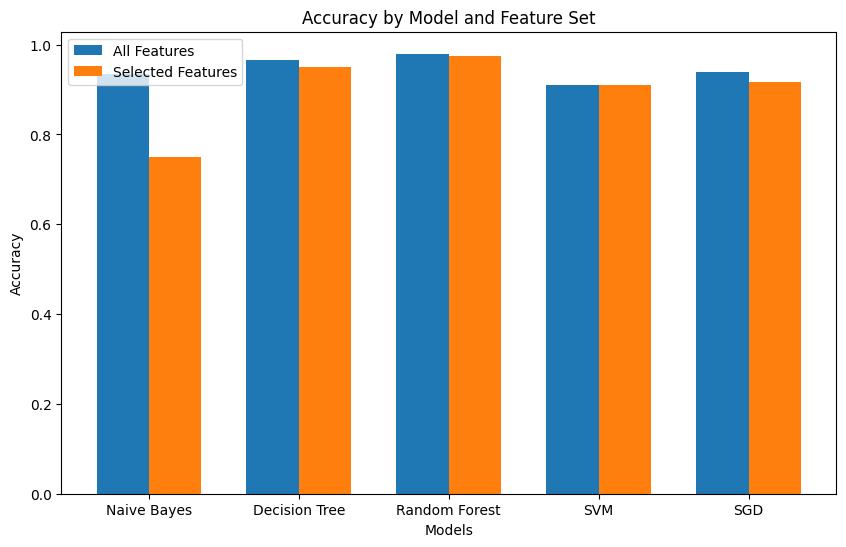

In [8]:
# Plot the accuracy scores
data = {
    'Naive Bayes': {'All Features': [list(results_all_features.values())[0]], 'Selected Features': [list(results_selected_features.values())[0]]},
    'Decision Tree': {'All Features': [list(results_all_features.values())[1]], 'Selected Features': [list(results_selected_features.values())[1]]},
    'Random Forest': {'All Features' :[list(results_all_features.values())[2]], 'Selected Features': [list(results_selected_features.values())[2]]},
    'SVM': {'All Features': [list(results_all_features.values())[3]], 'Selected Features': [list(results_selected_features.values())[3]]},
    'SGD': {'All Features': [list(results_all_features.values())[4]], 'Selected Features': [list(results_selected_features.values())[4]]}
}

models1 = list(data.keys())
all_features_accuracy = [data[model]['All Features'][0] for model in models1]
selected_features_accuracy = [data[model]['Selected Features'][0] for model in models1]

x = np.arange(len(models1))

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35

rects1 = ax.bar(x - width/2, all_features_accuracy, width, label='All Features')
rects2 = ax.bar(x + width/2, selected_features_accuracy, width, label='Selected Features')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Model and Feature Set')
ax.set_xticks(x)
ax.set_xticklabels(models1)
ax.legend()

plt.show()

# **All features and Selected features listed**

In [9]:
print("All Featuers:")
print(X.shape)
print(X)

print("\nSelected Features:")
print(X_selected.shape)
print(X_selected)

All Featuers:
(5406, 10)
      height  length  area    eccen  p_black  p_and  mean_tr  blackpix  \
0          5       7    35    1.400    0.400  0.657     2.33        14   
1          6       7    42    1.167    0.429  0.881     3.60        18   
2          6      18   108    3.000    0.287  0.741     4.43        31   
3          5       7    35    1.400    0.371  0.743     4.33        13   
4          6       3    18    0.500    0.500  0.944     2.25         9   
...      ...     ...   ...      ...      ...    ...      ...       ...   
5466       1     279   279  279.000    0.964  1.000    38.43       269   
5468       4     524  2096  131.000    0.542  0.603    40.57      1136   
5469       7       4    28    0.571    0.714  0.929    10.00        20   
5470       6      95   570   15.833    0.300  0.911     1.64       171   
5471       7      41   287    5.857    0.213  0.801     1.36        61   

      blackand  wb_trans  
0           23         6  
1           37         5  
2    

# **Decide highest model to use**

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]
print(highest_model)

RandomForestClassifier(random_state=42)


# **Ensemble using best-performing model by stacking, adaboost, and bagging on all features**

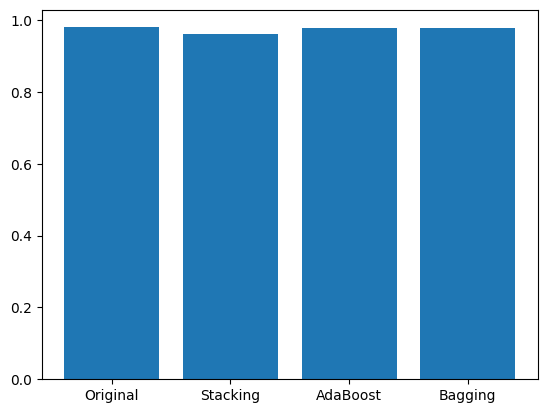

Summary of Model Accuracies:
Original: 0.9797
Stacking: 0.9612
AdaBoost: 0.9787
Bagging: 0.9787
Precision: 0.9796475113053293
Recall: 0.9796672828096118
F1 Score: 0.9792690960372055
Precision: 0.9637261579041384
Recall: 0.9611829944547134
F1 Score: 0.961689845603502
Precision: 0.9784650551826399
Recall: 0.9787430683918669
F1 Score: 0.9781472745471752
Precision: 0.9792299476727386
Recall: 0.9787430683918669
F1 Score: 0.9784476735632596
Original:
  Precision: 0.9796475113053293
  Recall: 0.9796672828096118
  F1: 0.9792690960372055
Stacking:
  Precision: 0.9637261579041384
  Recall: 0.9611829944547134
  F1: 0.961689845603502
AdaBoost:
  Precision: 0.9784650551826399
  Recall: 0.9787430683918669
  F1: 0.9781472745471752
Bagging:
  Precision: 0.9792299476727386
  Recall: 0.9787430683918669
  F1: 0.9784476735632596



In [11]:
# Train and evaluate the highest performing model with all features
model_o = highest_model.fit(X_train, y_train)
predictions_highest = highest_model.predict(X_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=DecisionTreeClassifier())
model_s = stacking_model.fit(X_train, y_train)
stacking_accuracy = stacking_model.score(X_test, y_test)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators = 100)
model_a = adaboost_model.fit(X_train, y_train)
adaboost_accuracy = adaboost_model.score(X_test, y_test)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=highest_model, n_estimators = 100)
model_b = bagging_model.fit(X_train, y_train)
bagging_accuracy = bagging_model.score(X_test, y_test)

# Plotting
models_accuracy = {
    "Original": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

data = {
    'Original': accuracy_highest, 'Stacking': stacking_accuracy, 'AdaBoost': adaboost_accuracy, 'Bagging': bagging_accuracy
}
data_one = data
types = list(data.keys())
values = list(data.values())
plt.bar(types, values)
plt.show()

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy:.4f}")

# Assuming y_true are true labels and y_pred are predicted labels
# Compute precision
y_pred = model_o.predict(X_test)
precision11 = precision_score(y_test, y_pred, average='weighted')
recall11 = recall_score(y_test, y_pred, average='weighted')
f111 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision11)
print("Recall:", recall11)
print("F1 Score:", f111)
y_pred = model_s.predict(X_test)
precision12 = precision_score(y_test, y_pred, average='weighted')
recall12 = recall_score(y_test, y_pred, average='weighted')
f112 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision12)
print("Recall:", recall12)
print("F1 Score:", f112)
y_pred = model_a.predict(X_test)
precision13 = precision_score(y_test, y_pred, average='weighted')
recall13 = recall_score(y_test, y_pred, average='weighted')
f113 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision13)
print("Recall:", recall13)
print("F1 Score:", f113)
y_pred = model_b.predict(X_test)
precision14 = precision_score(y_test, y_pred, average='weighted')
recall14 = recall_score(y_test, y_pred, average='weighted')
f114 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision14)
print("Recall:", recall14)
print("F1 Score:", f114)

metr1 = {
    'Original': {
        'Precision': precision11,
        'Recall': recall11,
        'F1': f111
    },
    'Stacking': {
        'Precision': precision12,
        'Recall': recall12,
        'F1': f112
    },
    'AdaBoost': {
        'Precision': precision13,
        'Recall': recall13,
        'F1': f113
    },
    'Bagging': {
        'Precision': precision14,
        'Recall': recall14,
        'F1': f114
    }
}
for line, metrics in metr1.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character

# **Ensemble using best-performing model by stacking, adaboost, and bagging on selected features**

RandomForestClassifier(random_state=42)


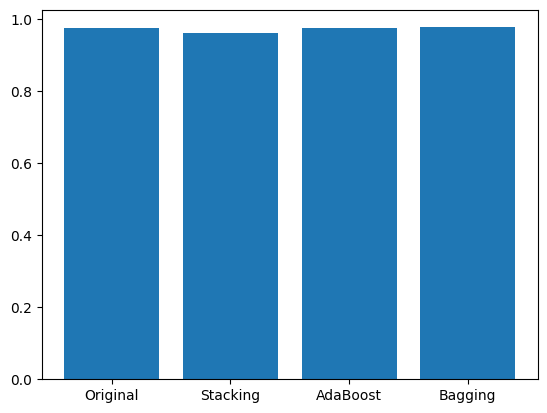

Summary of Model Accuracies:
Original: 0.9741
Stacking: 0.9621
AdaBoost: 0.9750
Bagging: 0.9769
Precision: 0.973508860693713
Recall: 0.9741219963031423
F1 Score: 0.9726847585330163
Precision: 0.9663087658397488
Recall: 0.9621072088724584
F1 Score: 0.9637216675439529
Precision: 0.9748959450900302
Recall: 0.9750462107208873
F1 Score: 0.9737286835069224
Precision: 0.9766477716194478
Recall: 0.9768946395563771
F1 Score: 0.9753274657998248
Original:
  Precision: 0.973508860693713
  Recall: 0.9741219963031423
  F1: 0.9726847585330163
Stacking:
  Precision: 0.9663087658397488
  Recall: 0.9621072088724584
  F1: 0.9637216675439529
AdaBoost:
  Precision: 0.9748959450900302
  Recall: 0.9750462107208873
  F1: 0.9737286835069224
Bagging:
  Precision: 0.9766477716194478
  Recall: 0.9768946395563771
  F1: 0.9753274657998248



In [12]:
highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]
print(highest_model)

# Train and evaluate the highest performing model with selected features
model_o = highest_model.fit(X_train_st, y_train_st)
predictions_highest = highest_model.predict(X_test_st)
accuracy_highest = accuracy_score(y_test_st, predictions_highest)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=DecisionTreeClassifier())
model_s = stacking_model.fit(X_train_st, y_train_st)
stacking_accuracy = stacking_model.score(X_test_st, y_test_st)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators = 100)
model_a = adaboost_model.fit(X_train_st, y_train_st)
adaboost_accuracy = adaboost_model.score(X_test_st, y_test_st)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=highest_model, n_estimators = 100)
model_b = bagging_model.fit(X_train_st, y_train_st)
bagging_accuracy = bagging_model.score(X_test_st, y_test_st)

# Plotting
models_accuracy = {
    "Original": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

data = {
    'Original': accuracy_highest, 'Stacking': stacking_accuracy, 'AdaBoost': adaboost_accuracy, 'Bagging': bagging_accuracy
}
data_two = data
types = list(data.keys())
values = list(data.values())
plt.bar(types, values)
plt.show()

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy:.4f}")

# Assuming y_true are true labels and y_pred are predicted labels
# Compute precision
y_pred = model_o.predict(X_test_st)
precision21 = precision_score(y_test_st, y_pred, average='weighted')
recall21 = recall_score(y_test_st, y_pred, average='weighted')
f121 = f1_score(y_test_st, y_pred, average='weighted')
print("Precision:", precision21)
print("Recall:", recall21)
print("F1 Score:", f121)
y_pred = model_s.predict(X_test_st)
precision22 = precision_score(y_test_st, y_pred, average='weighted')
recall22 = recall_score(y_test_st, y_pred, average='weighted')
f122 = f1_score(y_test_st, y_pred, average='weighted')
print("Precision:", precision22)
print("Recall:", recall22)
print("F1 Score:", f122)
y_pred = model_a.predict(X_test_st)
precision23 = precision_score(y_test_st, y_pred, average='weighted')
recall23 = recall_score(y_test_st, y_pred, average='weighted')
f123 = f1_score(y_test_st, y_pred, average='weighted')
print("Precision:", precision23)
print("Recall:", recall23)
print("F1 Score:", f123)
y_pred = model_b.predict(X_test_st)
precision24 = precision_score(y_test_st, y_pred, average='weighted')
recall24 = recall_score(y_test_st, y_pred, average='weighted')
f124 = f1_score(y_test_st, y_pred, average='weighted')
print("Precision:", precision24)
print("Recall:", recall24)
print("F1 Score:", f124)

metr2 = {
    'Original': {
        'Precision': precision21,
        'Recall': recall21,
        'F1': f121
    },
    'Stacking': {
        'Precision': precision22,
        'Recall': recall22,
        'F1': f122
    },
    'AdaBoost': {
        'Precision': precision23,
        'Recall': recall23,
        'F1': f123
    },
    'Bagging': {
        'Precision': precision24,
        'Recall': recall24,
        'F1': f124
    }
}
for line, metrics in metr2.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character

# **Ensemble using best-performing model by stacking, adaboost, and bagging on no multicollinearity and outliers. FINAL MODEL**

['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'blackand', 'wb_trans']
Dropping length with VIF=903.107908047932
Dropping blackand with VIF=99.98884060575617
Dropping wb_trans with VIF=64.11595485864339
Dropping p_and with VIF=44.569140067539124
Dropping area with VIF=34.60813781541294
Dropping mean_tr with VIF=16.93459894684471
Dropping height with VIF=10.162168700313924
Remaining variables: Index(['eccen', 'p_black', 'blackpix'], dtype='object')
RandomForestClassifier(random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


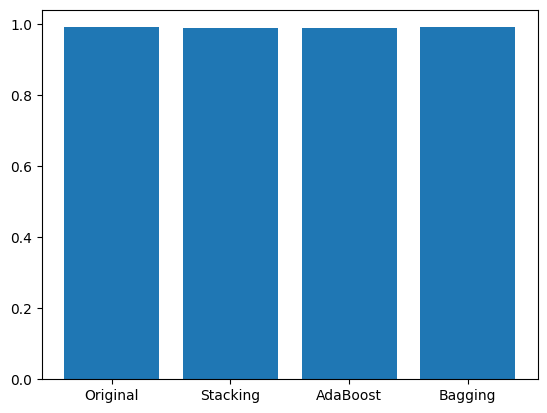

Summary of Model Accuracies:
Original: 99.20%
Stacking: 99.07%
AdaBoost: 99.07%
Bagging: 99.20%
Precision: 0.988747186133407
Recall: 0.9920318725099602
F1 Score: 0.9899556203313139
Precision: 0.9908882280147888
Recall: 0.9907038512616202
F1 Score: 0.9907007380168986
Precision: 0.9841167245909977
Recall: 0.9907038512616202
F1 Score: 0.9873993020579457


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.9841272360756178
Recall: 0.9920318725099602
F1 Score: 0.9880637450199202
Original:
  Precision: 0.988747186133407
  Recall: 0.9920318725099602
  F1: 0.9899556203313139
Stacking:
  Precision: 0.9908882280147888
  Recall: 0.9907038512616202
  F1: 0.9907007380168986
AdaBoost:
  Precision: 0.9841167245909977
  Recall: 0.9907038512616202
  F1: 0.9873993020579457
Bagging:
  Precision: 0.9841272360756178
  Recall: 0.9920318725099602
  F1: 0.9880637450199202



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = letreg_dup[['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'blackand', 'wb_trans']]
y = letreg_dup['class']

print(list(X.columns))
feature_names = list(X.columns)

df = pd.DataFrame(X, columns=feature_names)
df['class'] = y  # Add target column to the DataFrame
# Remove outliers
Q1 = df.drop(columns=['class']).quantile(0.25)
Q3 = df.drop(columns=['class']).quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df.drop(columns=['class']) < (Q1 - 1.5 * IQR)) | (df.drop(columns=['class']) > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove multicollinearity using VIF
def calculate_vif(X, thresh=7.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in range(X.iloc[:, variables].shape[1])]
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f"Dropping {X.iloc[:, variables].columns[maxloc]} with VIF={max_vif}")
            del variables[maxloc]
            dropped = True
    print(f'Remaining variables: {X.columns[variables]}')
    return X.iloc[:, variables]

X_no_multicollinearity = calculate_vif(df_no_outliers.drop(columns=['class']))

# Update class labels after removing outliers and multicollinearity
y_no_outliers_multicollinearity = df_no_outliers['class']
X_no_outliers_multicollinearity = df_no_outliers.drop(columns=['class'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers_multicollinearity, y_no_outliers_multicollinearity, test_size=0.2, random_state=42)

threshold = 0.5

highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]
print(highest_model)


# Train and evaluate the highest performing model with RFE-selected features
model_o = highest_model.fit(X_train, y_train)
predictions_highest = highest_model.predict(X_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)

# Apply ensemble techniques to the highest performing model
# Stacking Classifier
stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=DecisionTreeClassifier())
model_s = stacking_model.fit(X_train, y_train)
stacking_accuracy = stacking_model.score(X_test, y_test)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators = 100)
model_a = adaboost_model.fit(X_train, y_train)
adaboost_accuracy = adaboost_model.score(X_test, y_test)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=highest_model, n_estimators = 100)
model_b = bagging_model.fit(X_train, y_train)
bagging_accuracy = bagging_model.score(X_test, y_test)

# Plotting
models_accuracy = {
    "Original": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}
data = {
    'Original': accuracy_highest, 'Stacking': stacking_accuracy, 'AdaBoost': adaboost_accuracy, 'Bagging': bagging_accuracy
}
data_three = data
types = list(data.keys())
values = list(data.values())
plt.bar(types, values)
plt.show()

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy*100:.2f}%")

# Assuming y_true are true labels and y_pred are predicted labels
# Compute precision
y_pred = model_o.predict(X_test)
precision31 = precision_score(y_test, y_pred, average='weighted')
recall31 = recall_score(y_test, y_pred, average='weighted')
f131 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision31)
print("Recall:", recall31)
print("F1 Score:", f131)
y_pred = model_s.predict(X_test)
precision32 = precision_score(y_test, y_pred, average='weighted')
recall32 = recall_score(y_test, y_pred, average='weighted')
f132 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision32)
print("Recall:", recall32)
print("F1 Score:", f132)
y_pred = model_a.predict(X_test)
precision33 = precision_score(y_test, y_pred, average='weighted')
recall33 = recall_score(y_test, y_pred, average='weighted')
f133 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision33)
print("Recall:", recall33)
print("F1 Score:", f133)
y_pred = model_b.predict(X_test)
precision34 = precision_score(y_test, y_pred, average='weighted')
recall34 = recall_score(y_test, y_pred, average='weighted')
f134 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision34)
print("Recall:", recall34)
print("F1 Score:", f134)

metr3 = {
    'Original': {
        'Precision': precision31,
        'Recall': recall31,
        'F1': f131
    },
    'Stacking': {
        'Precision': precision32,
        'Recall': recall32,
        'F1': f132
    },
    'AdaBoost': {
        'Precision': precision33,
        'Recall': recall33,
        'F1': f133
    },
    'Bagging': {
        'Precision': precision34,
        'Recall': recall34,
        'F1': f134
    },
}
for line, metrics in metr3.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character

# **Results and Plot**

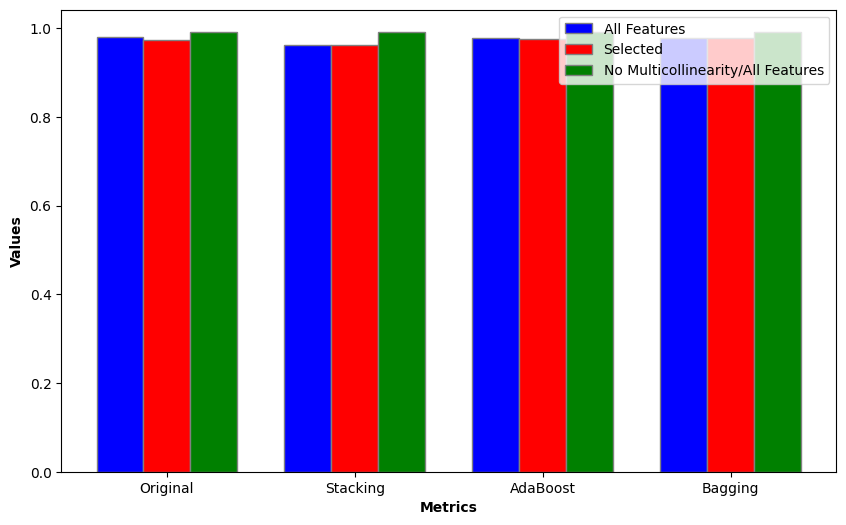

All Features {'Original': 0.9796672828096118, 'Stacking': 0.9611829944547134, 'AdaBoost': 0.9787430683918669, 'Bagging': 0.9787430683918669}
-----------------------------------------------
Selected Features {'Original': 0.9741219963031423, 'Stacking': 0.9621072088724584, 'AdaBoost': 0.9750462107208873, 'Bagging': 0.9768946395563771}
-----------------------------------------------
No Multicollinearity {'Original': 0.9920318725099602, 'Stacking': 0.9907038512616202, 'AdaBoost': 0.9907038512616202, 'Bagging': 0.9920318725099602}
+++++++++++++++++++++++++++++++++++++++++++++++
All Features:
Original:
  Precision: 0.9796475113053293
  Recall: 0.9796672828096118
  F1: 0.9792690960372055
Stacking:
  Precision: 0.9637261579041384
  Recall: 0.9611829944547134
  F1: 0.961689845603502
AdaBoost:
  Precision: 0.9784650551826399
  Recall: 0.9787430683918669
  F1: 0.9781472745471752
Bagging:
  Precision: 0.9792299476727386
  Recall: 0.9787430683918669
  F1: 0.9784476735632596

-----------------------

In [14]:
data_one, data_two, data_three, metr1, metr2, metr3
fig, ax = plt.subplots(figsize=(10, 6))

# Combine keys and values of all datasets
types = list(data_one.keys())
values = list(data_one.values())

types1 = list(data_two.keys())
values1 = list(data_two.values())

types2 = list(data_three.keys())
values2 = list(data_three.values())

# Set width of bar
bar_width = 0.25

# Set position of bar on X axis
r1 = range(len(types))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.bar(r1, values, color='b', width=bar_width, edgecolor='grey', label='All Features')
plt.bar(r2, values1, color='r', width=bar_width, edgecolor='grey', label='Selected')
plt.bar(r3, values2, color='g', width=bar_width, edgecolor='grey', label='No Multicollinearity/All Features')

# Adding xticks
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(types))], types)

# Adding legend
plt.legend()

# Showing plot
plt.show()
print('All Features',data_one)
print('-----------------------------------------------')
print('Selected Features',data_two)
print('-----------------------------------------------')
print('No Multicollinearity',data_three)
print('+++++++++++++++++++++++++++++++++++++++++++++++')
print('All Features:')
for line, metrics in metr1.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character
print('-----------------------------------------------')
print('Selected Features:')
for line, metrics in metr2.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character
print('-----------------------------------------------')
print('No Multicollinearity:')
for line, metrics in metr3.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character